In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rn
from scipy.stats import poisson

In [3]:
histogram = []
poi = []
F = []
histogram1 = []
histogram2 = []
aux = []
aux2 = []
poicdf = []

In [4]:
#------------------------------------------------------------
#to get range (it could be better tho)
#------------------------------------------------------------
for i in range(1000):
       aux.append(poisson.rvs(1000, size=1))


In [5]:
#------------------------------------------------------------
#aux2 definition
#------------------------------------------------------------
aux2 = poisson.rvs(1000,size=1000)

In [6]:
#------------------------------------------------------------
#Initialize histogram
#------------------------------------------------------------

for i in range(np.max(aux)):
    histogram1.append(0)
for i in range(np.max(aux2)):
    histogram2.append(0)


In [7]:
#------------------------------------------------------------
#Histogram
#------------------------------------------------------------
for i in range(1000):
    r=aux[i]
    for j in range(np.max(aux)):
        if r >= j-1 and r < j:
            bingo1 = j
            break
    histogram1[bingo1] += 1

In [8]:
#------------------------------------------------------------
#Histogram2
#------------------------------------------------------------
for i in range(1000):
    r=aux2[i]
    for j in range(np.max(aux2)):
        if r >= j-1 and r < j:
            bingo2 = j
            break
    histogram2[bingo2] += 1

In [9]:
#------------------------------------------------------------
#MonteCarlo
#------------------------------------------------------------
for i in range(0,1200):
    poi.append(poisson.pmf(i,1000))
for i in range(0,1200):
    poicdf.append(poisson.cdf(i,1000))

histogram = list(np.zeros(len(range(1, len(poi) - 1))))

rn.seed(123456789)
for i in range(1000):
        
    r = rn.uniform(0, 1)
    for j in range(1, len(poi) - 1):
        if r >= poicdf[j-1] and r < poicdf[j]:
            bingo = j
            break
    histogram[bingo] += 1 

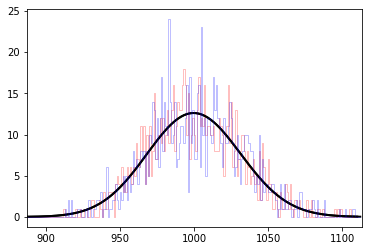

In [13]:
#------------------------------------------------------------
#Plot settings
#------------------------------------------------------------
plt.figure(1)
x1 = np.arange(0,np.max(aux),1)
plt.xlim(1000-(np.max(aux)-1000),np.max(aux))
plt.plot(x1,1000*poisson.pmf(x1,1000),alpha=1,color='black',linewidth=2)
plt.plot(range(np.max(aux)),histogram1,color='red',drawstyle="steps-mid",linewidth=0.5,alpha=0.5)

x2 = np.arange(0,np.max(aux2),1)
plt.xlim(1000-(np.max(aux2)-1000),np.max(aux2))
plt.plot(x2,1000*poisson.pmf(x2,1000),alpha=1,color='black',linewidth=2)
plt.plot(range(np.max(aux2)),histogram2,color='blue',drawstyle="steps-mid",linewidth=0.5,alpha=0.5)
plt.show()